ColDefs(
    name = 'region'; format = '6A'
    name = 'subject_id'; format = '24A'
    name = 'survey_id'; format = '7A'
    name = 'zooniverse_id'; format = '10A'
    name = 'features_total'; format = 'D'
    name = 'edgeon_total'; format = 'D'
    name = 'bar_total'; format = 'D'
    name = 'spiral_total'; format = 'D'
    name = 'bulge_total'; format = 'D'
    name = 'spiralwinding_total'; format = 'D'
    name = 'spiralnumber_total'; format = 'D'
    name = 'bulgeshape_total'; format = 'D'
    name = 'round_total'; format = 'D'
    name = 'mergers_total'; format = 'D'
    name = 'oddtype_total'; format = 'D'
    name = 'discuss_total'; format = 'D'
    name = 'odd_total'; format = 'D'
    name = 'features_smooth_frac'; format = 'D'
    name = 'features_features_frac'; format = 'D'
    name = 'features_star_or_artifact_frac'; format = 'D'
    name = 'edgeon_yes_frac'; format = 'D'
    name = 'edgeon_no_frac'; format = 'D'
    name = 'bar_bar_frac'; format = 'D'
    name = 'bar_no_b

/Users/holwerda/anaconda3/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/holwerda/anaconda3/envs/astroconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


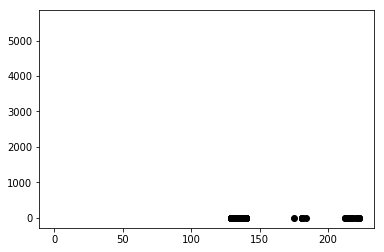

In [24]:
# Reading in the GAMA/KiDS Data

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

hdul = fits.open('galaxy_zoo_gama_cleaned.fits')  # open a FITS file
data = hdul[1].data  # assume the first extension is a table
print(hdul[1].columns)

subj_id = data['subject_id']
survey_id = data['survey_id'] # GAMA IDs
zooniverse_id = data['zooniverse_id']

# Total number of votes in features
# features_total = data['features_total']
# edgeon_total = data['edgeon_total']
                 
# features_smooth_frac = data['features_smooth_frac']
# features_features_frac = data['features_features_frac']
# features_star_or_artifact_frac = data['features_star_or_artifact_frac']

# # fraction Edgeon==Y
# edgeon_yes_frac = data['edgeon_yes_frac']
# edgeon_no_frac = data['edgeon_no_frac']

# # fraction of votes voting for lens or arc
# oddtype_lens_or_arc_frac = data['oddtype_lens_or_arc_frac']
# print(oddtype_lens_or_arc_frac)
# oddtype_lens_or_arc_total = data['oddtype_lens_or_arc_total']



# # Merging? Y/N
# mergers_merging_frac      = data['mergers_merging_frac']
# mergers_tidal_debris_frac = data['mergers_tidal_debris_frac']
# mergers_both_frac         = data['mergers_both_frac']
# mergers_neither_frac      = data['mergers_neither_frac']
# bulgeshape_rounded_frac   = data['bulgeshape_rounded_frac']
# bulgeshape_boxy_frac      = data['bulgeshape_boxy_frac']
# bulgeshape_no_bulge_frac  = data['bulgeshape_no_bulge_frac']
                 
oddtype_lens_arc_frac    = data['oddtype_lens_or_arc_frac']

hdul.close()

print(len(oddtype_lens_arc_frac))

plt.hist(oddtype_lens_arc_frac,range=[0.05,1],bins=20)


hdul = fits.open('AATSpecAll.fits')  # open a FITS file
gama = hdul[1].data  # assume the first extension is a table
# print(hdul[1].columns)

gama_id = gama['CATAID']
gama_ra = gama['RA']
gama_dec = gama['DEC']

print(gama_id)

# matching up RA DEC using the GAMA ID

where_galaxyzoo = np.in1d(gama_id,survey_id)

galaxyzoo_ra = gama_ra[where_galaxyzoo]
galaxyzoo_dec = gama_dec[where_galaxyzoo]

plt.plot(galaxyzoo_ra,galaxyzoo_dec,'ko')


In [1]:

hdul = fits.open('AATSpecAll.fits')  # open a FITS file
gama = hdul[1].data  # assume the first extension is a table
# print(hdul[1].columns)

gama_id = gama['CATAID']
gama_ra = gama['RA']
gama_dec = gama['DEC']

print(gama_id)

# matching up RA DEC using the GAMA ID

where_galaxyzoo = np.in1d(gama_id,survey_id)

galaxyzoo_ra = gama_ra[where_galaxyzoo]
galaxyzoo_dec = gama_dec[where_galaxyzoo]

print(
    len(galaxyzoo_ra),
    len(oddtype_lens_arc_frac)
)
wherelens = np.where(oddtype_lens_arc_frac>0.05)

plt.plot(galaxyzoo_ra,galaxyzoo_dec,'k.')
plt.plot(galaxyzoo_ra[wherelens],galaxyzoo_dec[wherelens],'bo')




NameError: name 'fits' is not defined

In [10]:
# Petrillo et al Machine LEarning results 
from astropy.io import ascii


ML = ascii.read("./linkstable.csv") # ,names=['z','re'])
print(ML)
ml_ra = ML['RA']
print(ml_ra)

 ID  score   P1    P3      RA       DEC    DISC
---- ----- ----- ----- --------- --------- ----
 805    70   1.0 0.999 159.78072  -2.27497    0
1588    70 0.999 0.999 333.41257 -33.19898    0
2854    70   1.0   1.0  46.66543 -27.60745    0
2075    70 0.957    -- 338.65674 -32.36358    0
2251    64 0.887 0.901 131.33397  -0.91563    0
3096    64    -- 0.937 357.76907 -32.88947    0
2729    64   1.0   1.0  203.7478   0.27151    0
 329    58    -- 0.929 200.23593   1.66408    0
 738    58    -- 0.948  23.51542 -30.54075    0
1078    58 0.987 0.953 356.83185 -33.50623    0
 ...   ...   ...   ...       ...       ...  ...
2207    16 0.952 0.951 212.50432   1.49919    2
3169    16 0.989 0.981 217.50757  -1.84587    2
 593    14 0.834    -- 185.20137   0.36279    2
2429    12 0.876 0.928 138.37955   0.65181    2
 104     8 0.939 0.963  336.6181 -33.74481    2
1521     4 0.931    -- 132.11688   2.37434    2
2250     4 0.997    -- 176.70961  -1.43842    2
1938    42 0.903 0.992 129.35904   1.944

In [13]:
# reading in the spectroscopic sample

Spec = ascii.read("./final_sample.csv",names=['id','ra','dec','z1','z2','spec_type','cataid'])
print(Spec)

 id     ra      dec      z1     z2   spec_type  cataid
--- --------- -------- ------ ------ --------- -------
  0  138.2815 -0.66673  0.163  0.321    PG+ELG  198082
  1 129.69546 -0.38179  0.418  0.738    PG+ELG  202448
  2 136.63883 -0.35203  0.282  0.449    PG+ELG  204140
  3 132.36771   0.1636  0.128  0.603    PG+ELG  209222
  4 132.61013  0.11972  0.313  0.608    PG+ELG  209295
  5 134.02979  0.15244  0.167  0.158    PG+ELG  209584
  6 140.14187  0.97341  0.586  0.336    PG+ELG  279956
  7 135.32929  1.22984  0.487  0.247    PG+ELG  301818
  8 138.94058  1.33144  0.593  0.404    PG+ELG  302719
  9 130.73717  1.55957  0.416   0.35    PG+ELG  323200
...       ...      ...    ...    ...       ...     ...
131    348.69  -31.531 0.1955 0.2438    PG+ELG 5327168
142  340.2153  -30.458 0.2185 0.2602    PG+ELG 5205278
143   345.708 -31.6132 0.1017 0.2789    PG+ELG 5278488
144  344.9055 -31.1903 0.1835 0.6495    PG+ELG 5265318
187  342.7772 -33.0433 0.3207 0.3278    PG+ELG 5137833
188   343.

In [21]:
# crosscorrelating ML and Spec
k =0 
for i in range(len(ML['RA'])):
    for j in range(len(Spec['dec'])):
        if abs(ML['RA'][i] - Spec['ra'][j]) < 2./3600. and abs(ML['DEC'][i] - Spec['dec'][j]) < 2./3600. :
            print(ML['RA'][i],ML['DEC'][i])
            k +=1 
print(k)

342.05453 -30.91587
129.69547 -0.38179
130.73718 1.55961
215.069 2.22428
182.74348 1.59789
5
